In [1]:
#importing libraries 
import numpy as np
import math
import scipy.stats as st
import statistics as stats
import matplotlib.pyplot as plt
import cmath 
import pandas as pd
import xarray as xr 
from matplotlib.colors import LogNorm
from matplotlib import colors
%matplotlib inline  

$$ \frac{dC_{p}}{dt}=K_v\frac{d^{2} C_{p}}{dz^{2}}-k_1*C_{d} -S\frac{dC_p}{dz} $$

In [2]:
# $$ \int \frac{\delta^{2} C_{d}}{dz^{2}}= \int \frac{k_1}{D}*C_{d}  $$

# $$ C=e^{\frac{z}{\zeta}} $$

$$ \frac{C_{p[j,i+1]}-C_{p[j,i]}}{dt}=(\frac{K_v*(C_{p[j+1,i]}-2C_{p[j,i]}+C_{p[j-1,i]})}{dz^{2}}+k_1*C_{d[j,i]}-S*\frac{(C_{p[j+1,i]}-C_{p[j,i]})}{dz} ) $$


$$ C_{p[j,i+1]}=(\frac{K_v*(C_{p[j+1,i]}-2C_{p[j,i]}+C_{p[j-1,i]})}{dz^{2}}+k_1*C_{d[j,i]}-S*\frac{(C_{p[j+1,i]}-C_{p[j,i]})}{dz} )*dt+C_{p[j,i]} $$




$$ \frac{dC_{d}}{dt}=K_v\frac{d^{2} C_{d}}{dz^{2}}-k_1*C_{d}  $$

$$ \frac{C_{d[j,i+1]}-C_{d[j,i]}}{dt}=(\frac{K_v*(C_{d[j+1,i]}-2C_{d[j,i]}+C_{d[j-1,i]})}{dz^{2}}-k_1*C_{d[j,i]} ) $$

$$ C_{d[j,i+1]}=(\frac{K_v*(C_{d[j+1,i]}-2C_{d[j,i]}+C_{d[j-1,i]})}{dz^{2}}-k_1*C_{d[j,i]} )*dt +C_{d[j,i]}$$

$$ \frac{\delta C_{d}}{\delta t}=0=K_v*\frac{\delta C_{d}^{2}}{\delta z^{2}}-k_1*C_{d}  $$

$$ 0=K_v*\frac{\delta^{2} C_{d}}{\delta z^{2}}-k_1*C_{d}  $$

$$ K_v*\frac{\delta^{2} C_{d}}{\delta z^{2}}=k_1*C_{d}  $$

$$ \frac{\delta^{2} C_{d}}{\delta z^{2}}=\frac{k_1}{K_v}*C_{d}  $$


$$ C=C_0e^{\frac{-z}{\zeta}} $$

$$ \int \frac{\delta^{2}e^{\frac{z}{\zeta}} }{\delta z^{2}} = \int \frac{k_1}{K_v} e^{\frac{z}{\zeta}} $$

$$  (\frac{1}{\zeta})^{2} e^{\frac{z}{\zeta}} = \frac{k_1}{K_v} e^{\frac{z}{\zeta}} $$
$$  (\frac{1}{\zeta})^{2} e^{\frac{z}{\zeta}}-\frac{k_1}{K_v} e^{\frac{z}{\zeta}} =0$$
$$  e^{\frac{z}{\zeta}}( (\frac{1}{\zeta})^{2}-\frac{k_1}{K_v}) =0$$
$$  (\frac{1}{\zeta})^{2}-\frac{k_1}{K_v} =0$$
$$  (\frac{1}{\zeta})^{2}=\frac{k_1}{K_v}$$
$$  {\zeta}=\sqrt{\frac{K_v}{k_1}}$$

In [3]:
HaleyB_ds=pd.read_excel('watercolumn Nd for mia-2.xlsx', sheet_name='Sheet2')

Text(0, 0.5, 'depth(m)')

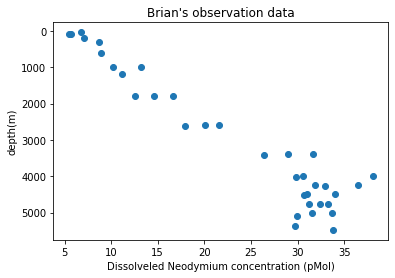

In [4]:
plt.title("Brian's observation data")
plt.plot(HaleyB_ds['Nd (pM)'],HaleyB_ds['Depth'],'o')
plt.gca().invert_yaxis()
plt.xlabel('Dissolveled Neodymium concentration (pMol)')
plt.ylabel('depth(m)')


In [5]:
dt=0.001
t_300=int(300/dt)
t_10000=int(10000/dt)

In [6]:

mw_c=0.06#  #Calcite sinking speed increase with depth (s-1) 
wc0=35    #constant calcite sinking speed [m/day] 

In [7]:

z_F=np.array([0,17.5,82.5,177.5,302.5,457.5, 642.5,857.5, 1102.5, 1377.5,1682.5, 2017.5, 2382.5, 2777.5, 3202.5,3657.5, 4142.5,4657.5,5202.5, 5777.5] )
num=(len(z_F))
dz=np.zeros(num-1)
z_C=np.zeros(num-1)
for i in range(num-1):
    dz[i]=z_F[i+1]-z_F[i]
    z_C[i]=(z_F[i+1]+z_F[i])/2

In [8]:

#dt=0.2#sec
#Sed_flux=(10e-12*100**2)#mol Nd yr intial sed flux in mol/m2 yr in proposal 20pmol cm-2 yr-1
#Sed_flux_5=(5e-12*100**2)#mol Nd yr intial sed flux in mol/m2 yr in proposal 20pmol cm-2 yr-1
Ko=(10**(-4)*60*60*24*365) #m2/s to m2/yr vertical diffusivity 
Kf=(10**(-5)*60*60*24*365) #m2/s to m2/yr vertical diffusivity 
c=1/500 #1/500m obervation e folding depth
#D=Ko*np.exp((-z_F[:]+z_F[-1])*-c)+Kf
D=Ko*np.exp((-z_C[:]+z_C[-1])*-c)+Kf 
Kp=0.001425#10**(-3)
K_desorp=0.0358 #desorption
zeta=np.sqrt(D/Kp)

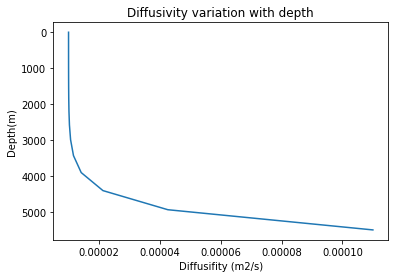

In [9]:
plt.title('Diffusivity variation with depth')
plt.plot(D/(60*60*24*365),z_C)
plt.xlabel("Diffusifity (m2/s)")
plt.ylabel("Depth(m)")
plt.gca().invert_yaxis()

In [10]:
area_freq=[0.000E+00,5.278E+12,2.898E+12, 2.974E+12,3.387E+12, 3.367E+12,8.289E+12,1.410E+13, 7.050E+12,8.256E+12,1.859E+13,2.469E+13,1.453E+13,2.496E+13,4.086E+13,5.308E+13,4.757E+13,4.940E+13,2.750E+13]

In [11]:
total_area=np.sum(area_freq)
rel_area=area_freq/total_area

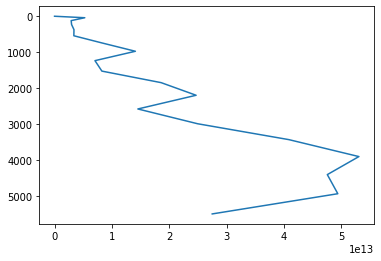

In [12]:
plt.plot(area_freq,z_C)
plt.gca().invert_yaxis()

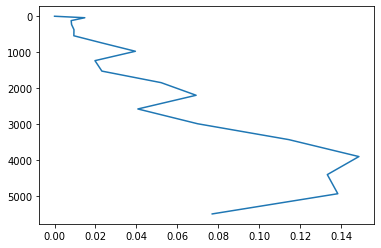

In [13]:
plt.plot(rel_area,z_C)
plt.gca().invert_yaxis()

In [14]:
F_b=((10e-12*100**2)*rel_area)/dz
#F_b_5=(Sed_flux_5*rel_area)/dz

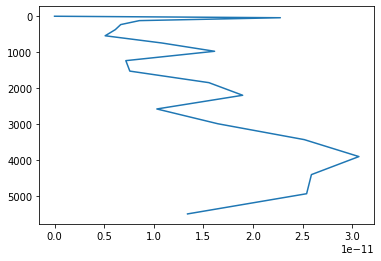

In [15]:
plt.plot(F_b,z_C)
plt.gca().invert_yaxis()

In [16]:
F_b

array([0.00000000e+00, 2.27591871e-11, 8.55018461e-12, 6.66855392e-12,
       6.12469145e-12, 5.10119710e-12, 1.08059859e-11, 1.61307197e-11,
       7.18550241e-12, 7.58700833e-12, 1.55537566e-11, 1.89595900e-11,
       1.03102509e-11, 1.64610058e-11, 2.51702588e-11, 3.06753758e-11,
       2.58896774e-11, 2.54056998e-11, 1.34049613e-11])

In [17]:
#modified 

In [18]:
#z_F:  is the depth layers (meters)
#dt:   time step (years) 
#Sed_flux: the sediment flux(pmol cm^-2 yr ^-1)
#Diffusivity :veritical Diffusivity (m/yr)
#Kp : Adsorption coefficeint (yr^-1)

#t: number of time steps (years)
mw_c=0.06#  #Calcite sinking speed increase with depth (s-1) 
wc0=35    #constant calcite sinking speed [m/day]

#function to calculate irriversable scavenging 
def calc_IR_conc(z_F,dt,Sed_Flux,Diffusivity,Kp,t):

    num=(len(z_F))                       #number of layers 
    dz=np.zeros(num-1)                   #the distance between layers empty array 
    z_C=np.zeros(num-1)                  #the depth at the center of the layer empty array 
    for i in range(num-1):               # for loop to fill dz and z_C array based on the z_F  
        dz[i]=z_F[i+1]-z_F[i]
        z_C[i]=(z_F[i+1]+z_F[i])/2
        
        
        
    
    
    Sed_flux_converted= (Sed_Flux*1e-12*100**2)#mol Nd yr intial sed flux in mol/m2 yr in proposal 20pmol cm-2 yr-1
    D=Diffusivity#m2/s to m2/yr vertical diffusivity 
    zeta=np.sqrt(D/Kp)    
    F_b=(Sed_flux_converted*rel_area)/dz
    
    
    Cd=np.zeros((num-1,t)) #2D depth and time array for dissolved concentration 10000 when p=1
    F=np.zeros((num,t-1)) #2D depth and time array for diffusive flux
    F_diffusion=np.zeros((num,t-1)) #2D depth and time array for diffusive flux
    Cp=np.zeros((num-1,t)) #2D depth and time array for particle concentration 
    F_p=np.zeros((num,t-1)) #2D depth and time array for diffusive flux for particle 
    S_F=np.zeros((num,t-1)) #2D depth and time array for sinking flux
    D_S=np.zeros((num-1,t-1)) #2D divergence of flux
    D_F=np.zeros((num-1,t-1)) #2D divergence of flux
    S=np.zeros((num-1)) #2D depth and time array for sinking speed
    vel=np.zeros((num-1)) #2D depth and time array for sinking speed
    #Cd[0,:]=16.73e-12*1000 # background Nd mol 

    F[-1,:]=0
    F_p[-1,:]=0  
    F[0,:]=0
    F_p[0,:]=0
    S_F[0,:]=0


    for k in range (0,num-1):            
 
        if z_F[k]<(1000):
            S[k]=(wc0+(mw_c)*(abs(z_F[0]-z_C[k])))/(60*60*24*dz[k])# s-1    
        elif z_F[k]>=(1000):
            S[k]=(wc0+mw_c*(1000))/(60*60*24*dz[k]) #s-1 
        vel[k]=S[k]*(60*60*24*365) #yr-1
    for i in range (0,t-1):                 
        for k in range (1,num-1):
        
            F[k,i]=D[k]*((Cd[k,i]-Cd[k-1,i])/dz[k])           

            F_p[k,i]=D[k]*((Cp[k,i]-Cp[k-1,i])/dz[k])
   
        for k in range(1,num):
        
            S_F[k,i]=vel[k-1]*Cp[k-1,i]
        for k in range(0,num-1):
       
        #divergence of advection 
            D_S[k,i]=(S_F[k+1,i]-S_F[k,i])#/dz[k] change this is the model 

            Cd[k,i+1]=((((F[k+1,i]-F[k,i])/dz[k])-Kp*Cd[k,i]+F_b[k])*dt+Cd[k,i])
            D_F[k,i]=(F_p[k+1,i]-F_p[k,i])/dz[k]      
       
            Cp[k,i+1]=((((F_p[k+1,i]-F_p[k,i])/dz[k])+(Kp*Cd[k,i])-D_S[k,i])*dt+Cp[k,i])
        
    return(Cd,Cp,z_C)
     

In [19]:
t_300

300000

In [20]:
Sed_Flux=10
Diffusivity=Ko*np.exp((-z_C[:]+z_C[-1])*-c)+Kf 
test_Cd, test_Cp, test_depth=calc_IR_conc(z_F,dt,Sed_Flux,Diffusivity,Kp,t_10000)

In [21]:
t=t_10000 #time steps
Cd=np.zeros((num-1,t)) #2D depth and time array for dissolved concentration 10000 when p=1
#Cd=np.full((num-1,t),16.73e-12) #2D depth and time array for dissolved concentration 10000 when p=1
F=np.zeros((num,t-1)) #2D depth and time array for diffusive flux
F_diffusion=np.zeros((num,t-1)) #2D depth and time array for diffusive flux
Cp=np.zeros((num-1,t)) #2D depth and time array for particle concentration 
F_p=np.zeros((num,t-1)) #2D depth and time array for diffusive flux for particle 
S_F=np.zeros((num,t-1)) #2D depth and time array for sinking flux
D_S=np.zeros((num-1,t-1)) #2D divergence of flux
D_F=np.zeros((num-1,t-1)) #2D divergence of flux
S=np.zeros((num-1)) #2D depth and time array for sinking speed
vel=np.zeros((num-1)) #2D depth and time array for sinking speed
#Cd[0,:]=16.73e-12*1000 # background Nd mol 

F[-1,:]=(10e-12*100**2)
F_p[-1,:]=0  
F[0,:]=0
F_p[0,:]=0
S_F[0,:]=0


for k in range (0,num-1):  
    
               
 
        if z_F[k]<(1000):
            S[k]=(wc0+(mw_c)*(abs(z_F[0]-z_C[k])))/(60*60*24*dz[k])# s-1    
        elif z_F[k]>=(1000):
            S[k]=(wc0+mw_c*(1000))/(60*60*24*dz[k]) #s-1 
        vel[k]=S[k]*(60*60*24*365) #yr-1
for i in range (0,t-1):
    #Cd[0][i+1]=(((F[1][i]-F[0][i])/dz[k])-kp*Cd[0][i])*dt+Cd[0][i]
    

            
  
    for k in range (1,num-1):
        
        F[k,i]=D[k]*((Cd[k,i]-Cd[k-1,i])/dz[k])
     
       

        F_p[k,i]=D[k]*((Cp[k,i]-Cp[k-1,i])/dz[k])
   
    for k in range(1,num):
        
        S_F[k,i]=vel[k-1]*Cp[k-1,i]
    for k in range(0,num-1):
       
        #divergence of advection 
        D_S[k,i]=(S_F[k+1,i]-S_F[k,i])#/dz[k] 

        Cd[k,i+1]=((((F[k+1,i]-F[k,i])/dz[k])-Kp*Cd[k,i])*dt+Cd[k,i])
        D_F[k,i]=(F_p[k+1,i]-F_p[k,i])/dz[k]     
        
        Cp[k,i+1]=(((D_F[k,i])+(Kp*Cd[k,i])-D_S[k,i])*dt+Cp[k,i])
     

In [22]:
np.min(dz/(vel*dz))

0.00134961873270801

In [23]:
Kp*Cd[:,26]

array([1.85669521e-103, 1.59036811e-099, 6.22696421e-095, 3.98509636e-090,
       3.55996579e-085, 4.04418941e-080, 5.48893693e-075, 8.50306864e-070,
       1.45035279e-064, 2.64237740e-059, 5.00147860e-054, 9.56335079e-049,
       1.78782408e-043, 3.12066937e-038, 4.70320318e-033, 5.28273946e-028,
       3.41553571e-023, 8.91383908e-019, 6.44251858e-015])

In [24]:
D_F[:,26]

array([ 2.16937321e-102,  1.71909984e-098,  6.14941436e-094,
        3.57221635e-089,  2.88795176e-084,  2.96982619e-079,
        3.66444934e-074,  5.21319955e-069,  8.10970002e-064,
        1.33431639e-058,  2.25410026e-053,  3.79077130e-048,
        6.11587504e-043,  8.97984816e-038,  1.09721358e-032,
        9.42796356e-028,  4.19314298e-023,  5.77920464e-019,
       -5.47805648e-019])

In [25]:
S_F[:,19]

array([0.00000000e+000, 0.00000000e+000, 3.91062945e-105, 9.96899620e-100,
       2.64286013e-094, 7.74084639e-089, 2.47204452e-083, 8.43093586e-078,
       3.01362219e-072, 9.65400121e-067, 3.08927512e-061, 9.80572900e-056,
       3.02134781e-050, 8.78714205e-045, 2.31093409e-039, 5.08922860e-034,
       8.09132999e-029, 7.12457860e-024, 2.37927134e-019, 1.85946273e-015])

In [26]:
D_S[:,26]

array([5.30359044e-103, 1.66902234e-099, 5.53426908e-095, 3.33932293e-090,
       2.98613245e-085, 3.52126599e-080, 5.08336230e-075, 8.54307757e-070,
       1.40152214e-064, 2.44328547e-059, 4.44414131e-054, 8.18925013e-049,
       1.47751496e-043, 2.48856519e-038, 3.60992243e-033, 3.87700400e-028,
       2.35998667e-023, 5.57019243e-019, 3.14852771e-015])

In [27]:
Cp[:,27]

array([2.54046619e-105, 2.49364917e-101, 9.58426717e-097, 5.95181939e-092,
       5.13927597e-087, 5.64677499e-082, 7.44791936e-077, 1.13226620e-071,
       1.92737704e-066, 3.50334265e-061, 6.60340436e-056, 1.25484914e-050,
       2.32573779e-045, 4.01136534e-040, 5.94345883e-035, 6.50619455e-030,
       4.03002594e-025, 9.66753674e-021, 5.55133055e-017])

In [28]:
Cd[:,27]

array([4.39728952e-100, 3.34807509e-096, 1.17982878e-091, 6.86420105e-087,
       5.62094254e-082, 5.89431245e-077, 7.42857516e-072, 1.07406346e-066,
       1.71751017e-061, 2.94504305e-056, 5.26467612e-051, 9.53678990e-046,
       1.69371546e-040, 2.81561977e-035, 4.05057259e-030, 4.35187548e-025,
       2.69645016e-020, 6.75568656e-016, 4.69492484e-012])

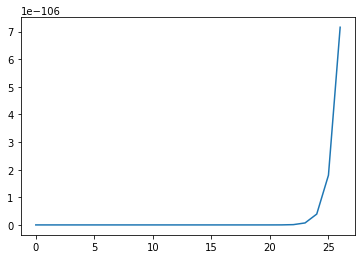

In [29]:
plt.plot(Cp[0,0:27])

In [30]:
Cp[:,-1]

array([1.73708038e-17, 1.20802522e-16, 2.38028090e-16, 3.73139574e-16,
       5.24778550e-16, 7.06571157e-16, 9.50258053e-16, 1.31584398e-15,
       2.20804121e-15, 3.98126878e-15, 7.67046498e-15, 1.58117259e-14,
       3.47353734e-14, 8.04856755e-14, 1.92432956e-13, 4.54245574e-13,
       9.88838615e-13, 1.87740878e-12, 3.09712504e-12])

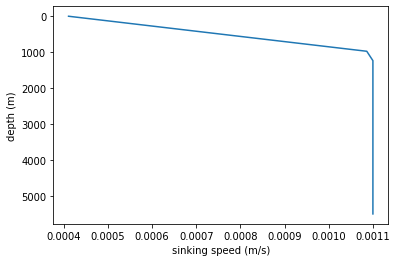

In [31]:

# sinking speed
plt.plot(vel/(60*60*24*365)*dz,z_C)
plt.xlabel('sinking speed (m/s)')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()

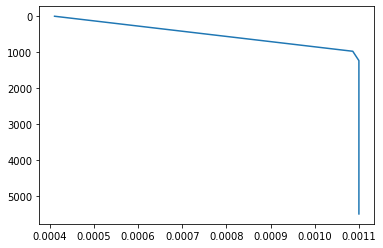

In [32]:

# sinking speed
plt.plot((vel*dz)/(60*60*24*365),z_C)
plt.gca().invert_yaxis()

In [33]:
# vert_bin=np.arange(0,np.max(Pacific['w_depth']),100)
# Nd_binned=np.zeros(len(vert_bin))
# #the mean of Nd concentration where the distance from the bottom is binned
# for i in range (0,len(vert_bin)):
#         Nd_binned[i]=np.mean(Pacific['Nd'][(Pacific['w_depth']<vert_bin[i])&(Pacific['w_depth']>vert_bin[i-1])])

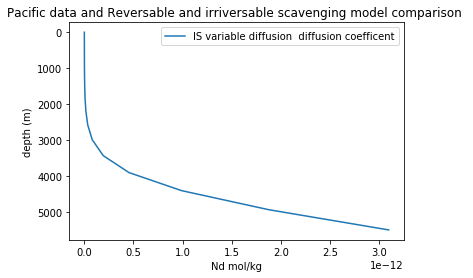

In [34]:

plt.title('Pacific data and Reversable and irriversable scavenging model comparison ')



plt.plot((Cp[:,-1]),z_C,label='IS variable diffusion  diffusion coefficent')
# plt.plot(Cp_1[:,-1]/1020,z_C,label='IS variable diffusion coefficent')
# plt.plot(Cp_2[:,-1]/1020,z_C,label='IS constant 10^-5 m^2/s diffusion coefficent')

plt.xlabel('Nd mol/kg')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1., 1),fontsize=10)

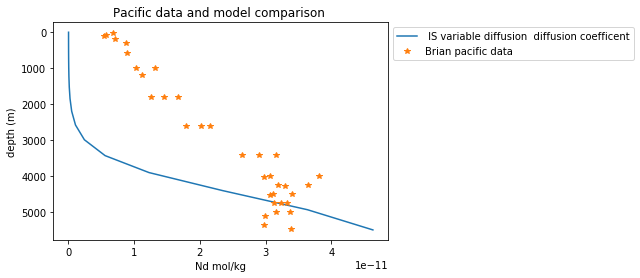

In [35]:
#plt.plot(z_C,Cp[:,-1],label='particulate')
plt.title('Pacific data and model comparison ')

plt.plot((Cd[:,-1])/1020,z_C,label=' IS variable diffusion  diffusion coefficent')
# plt.plot(Cd_1[:,-1]/1020,z_C,label=' IS variable diffusion coefficent')
# plt.plot(Cd_2[:,-1]/1020,z_C,label='IS  constant 10^-5 m^2/s diffusion coefficent')
#plt.plot(Nd_binned*1e-12,vert_bin,'*', label='observed binned data')
#plt.plot(Pacific['w_depth'],Pacific['Nd']*1e-12,'*',label='JD data')
plt.plot(HaleyB_ds['Nd (pM)']*1e-12,HaleyB_ds['Depth'],'*',label='Brian pacific data ')
plt.xlabel('Nd mol/kg')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1., 1),fontsize=10)

In [36]:
# vert_bin_frombot=np.arange(0,np.max(JD_ds_dropna['delta_bot']),100)
# Nd_binned_bot=np.zeros(len(vert_bin_frombot))
# #the mean of Nd concentration where the distance from the bottom is binned
# for i in range (0,len(vert_bin_frombot)):
#         Nd_binned_bot[i]=np.mean(JD_ds_dropna['Nd'][(JD_ds_dropna['delta_bot']<=vert_bin_frombot[i])&(JD_ds_dropna['delta_bot']>vert_bin_frombot[i-1])])

In [37]:
zeta_10_4=np.sqrt(Ko/Kp)
analytical=Cd[-1,-1]*np.exp((z_C[:]-z_C[-1])/zeta_10_4)

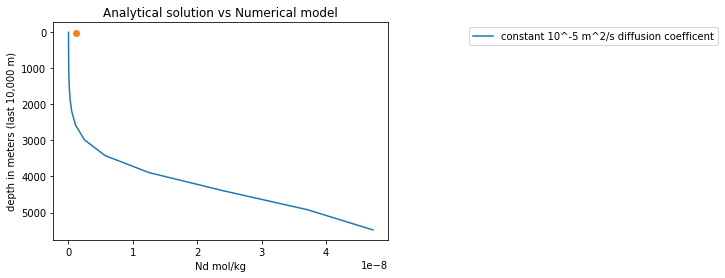

In [38]:
plt.title('Analytical solution vs Numerical model')

plt.plot(Cd[:,-1],z_C[:]-z_C[0],label='constant 10^-5 m^2/s diffusion coefficent')
plt.plot(analytical[0],z_C[0],"o")
plt.legend(bbox_to_anchor=(2, 1),fontsize=10)
plt.xlabel('Nd mol/kg')
plt.ylabel('depth in meters (last 10,000 m)')
plt.gca().invert_yaxis()

In [39]:
UVIC10000yr_ds=xr.open_dataset('tavg.01000.01.01.nc',decode_times=False)
GEOTRACERS_ds=xr.open_dataset('Nd_UVicgrid.nc',decode_times=False)

In [40]:
GEOTRACERS_ds

<xarray.Dataset>
Dimensions:         (DEPTH: 19, LATITUDE: 100, LONGITUDE: 100, bnds: 2)
Coordinates:
  * LONGITUDE       (LONGITUDE) float64 1.8 5.4 9.0 12.6 ... 351.0 354.6 358.2
  * LATITUDE        (LATITUDE) float64 -89.1 -87.3 -85.5 ... 85.5 87.3 89.1
  * DEPTH           (DEPTH) float64 17.5 82.5 177.5 ... 5.202e+03 5.778e+03
Dimensions without coordinates: bnds
Data variables:
    LONGITUDE_bnds  (LONGITUDE, bnds) float64 ...
    LATITUDE_bnds   (LATITUDE, bnds) float64 ...
    DEPTH_bnds      (DEPTH, bnds) float64 ...
    END_D_OBS       (DEPTH, LATITUDE, LONGITUDE) float64 ...
    END_P_OBS       (DEPTH, LATITUDE, LONGITUDE) float64 ...
    ND_D_OBS        (DEPTH, LATITUDE, LONGITUDE) float64 ...
    ND_P_OBS        (DEPTH, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      PyPyFerret V7.5 (optimized) 18-Aug-22
    Conventions:  CF-1.6

In [41]:
o_dnd=UVIC10000yr_ds.O_dnd
o_pnd=GEOTRACERS_ds.ND_P_OBS
o_dnd_ave=o_dnd.mean(dim=['latitude','longitude'])
o_pnd_ave=o_pnd.mean(dim=['LATITUDE','LONGITUDE'])

In [42]:
GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE'])

<xarray.DataArray 'ND_D_OBS' (DEPTH: 19)>
array([15.19503951, 11.37986209, 11.81932482, 12.25589886, 14.12610545,
       13.44904278, 14.45205284, 15.21294248, 16.06162192, 17.46210641,
       18.42986677, 20.22138517, 21.31064583, 23.97900704, 26.91334793,
       30.48211687, 33.15891764, 36.50060649, 35.485398  ])
Coordinates:
  * DEPTH    (DEPTH) float64 17.5 82.5 177.5 ... 4.658e+03 5.202e+03 5.778e+03

In [43]:
# uvic_pnd=UVIC10000yr_ds.O_dnd

# uvic_pnd_ave=o_dnd.mean(dim=['latitude','longitude'])

uvic_pnd=UVIC10000yr_ds.O_detrnd

uvic_pnd_ave=uvic_pnd.mean(dim=['latitude','longitude'])

In [44]:
# vert_bin=np.arange(0,np.max(JD_ds_dropna['w_depth']),100)
# Nd_binned=np.zeros(len(vert_bin))
# #the mean of Nd concentration where the distance from the bottom is binned
# for i in range (0,len(vert_bin)):
#         Nd_binned[i]=np.mean(JD_ds_dropna['Nd'][(JD_ds_dropna['w_depth']<vert_bin[i])&(JD_ds_dropna['w_depth']>vert_bin[i-1])])

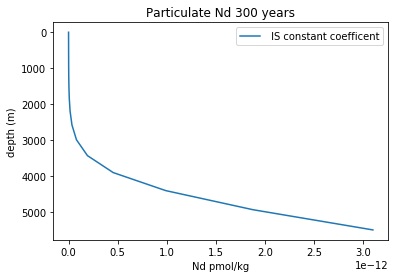

In [45]:
#plt.plot((Cp_1_rev[246:,-1]/1020)*(1e12),adjusted_z,label=' RS variable diffusion coefficent')
plt.title('Particulate Nd 300 years')
plt.plot(Cp[:,-1],z_C,label=' IS constant coefficent')
#plt.plot(Cp_1[:,-1]/1020*1e12,z_C,label=' IS variable diffusion coefficent')
#plt.plot(uvic_pnd_ave[9,:]/1020,UVIC10000yr_ds.depth,label='Uvic-10000yr run')
#plt.plot(o_pnd_ave,GEOTRACERS_ds.DEPTH,"*",label='Geotracers')
plt.xlabel('Nd pmol/kg')
plt.ylabel('depth (m)')
#plt.xlim(0,0.6)
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1., 1),fontsize=10)



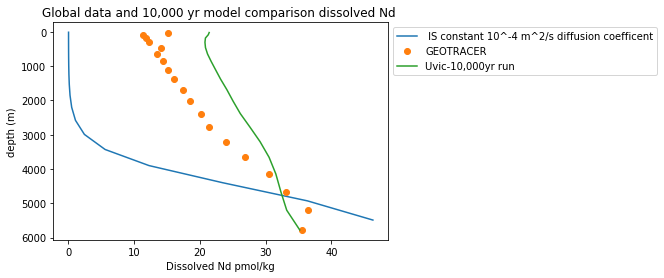

In [46]:
#plt.plot(z_C,Cp[:,-1],label='particulate')
plt.title('Global data and 10,000 yr model comparison dissolved Nd ')

plt.plot((Cd[:,-1]*1e12)/1020,z_C,label=' IS constant 10^-4 m^2/s diffusion coefficent')
#plt.plot(Cd_1[:,-1]*1e12/1020,z_C,label=' IS variable diffusion coefficent')
#plt.plot(Cd_2[:,-1]*1e12/1020,z_C,label='IS  constant 10^-5 m^2/s diffusion coefficent')
#plt.plot(Nd_binned*1e-12,vert_bin,'*', label='observed binned data')
#plt.plot(Pacific['Nd']*1e-12,Pacific['w_depth'],'*',label='JD data')
#plt.plot(HaleyB_ds['Nd (pM)']*1e-12,HaleyB_ds['Depth'],'*',label='Brian pacific data ')
plt.plot(GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE']),GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE']).DEPTH,"o",label="GEOTRACER")
plt.plot(o_dnd_ave[9,:]*1e12/1020,UVIC10000yr_ds.depth,label='Uvic-10,000yr run')

plt.xlabel('Dissolved Nd pmol/kg')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1., 1),fontsize=10)

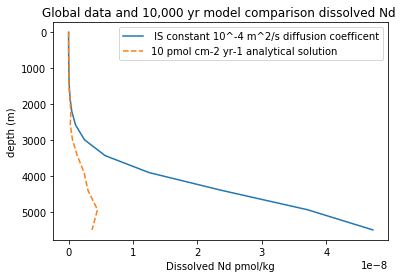

In [47]:

plt.title('Global data and 10,000 yr model comparison dissolved Nd ')

plt.plot(Cd[:,-1],z_C,label=' IS constant 10^-4 m^2/s diffusion coefficent')

plt.plot(analytical*rel_area,z_C,'--' ,label='10 pmol cm-2 yr-1 analytical solution')

# plt.plot(GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE']),GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE']).DEPTH,"o",label="GEOTRACER")
# plt.plot(o_dnd_ave[9,:]*1e12/1020,UVIC10000yr_ds.depth,label='Uvic-10,000yr run')

plt.xlabel('Dissolved Nd pmol/kg')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1., 1),fontsize=10)

In [48]:
rel_area

array([0.        , 0.01479347, 0.00812268, 0.00833569, 0.00949327,
       0.00943721, 0.02323287, 0.03952026, 0.01976013, 0.02314038,
       0.05210508, 0.0692025 , 0.04072549, 0.06995927, 0.11452468,
       0.14877557, 0.13333184, 0.13846106, 0.07707853])

In [49]:
# plt.title('Global data and 10,000 yr model comparison dissolved Nd ')

# #plt.plot((Cd[:,-1])/1020,z_C,label=' IS constant 10^-4 m^2/s diffusion coefficent')
# plt.plot(Cd_1[:,-1]*1e12/1020,z_C,label=' IS variable diffusion coefficent sed flux 10 pmol cm-2 yr-1')
# #plt.plot(Cd_2[:,-1]/1020,z_C,label='IS  constant 10^-5 m^2/s diffusion coefficent')
# plt.plot(Cd_5[:,-1]*1e12/1020,z_C,label=' IS variable diffusion coefficent sed flux 5 pmol cm-2 yr-1')
# #plt.plot(analytical/1020,z_C,'--' ,label='5pmol cm-2 yr-1 analytical solution')
# plt.plot(GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE']),GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE']).DEPTH,"o",label="GEOTRACER")
# plt.plot(o_dnd_ave[9,:]*1e12/1020,UVIC10000yr_ds.depth,label='Uvic-10,000yr run sed flux 10 pmol cm-2 yr-1')

# plt.xlabel('Dissolved Nd pmol/kg')
# plt.ylabel('depth (m)')
# plt.gca().invert_yaxis()
# plt.legend(bbox_to_anchor=(1., 1),fontsize=10)

In [50]:
# read in sedflux and kp values
flux_adsorp_desorp_df=pd.read_excel('Bflux_K_adsorption_desorption.xlsx')
bottom_fluxes=flux_adsorp_desorp_df['Benthic Fluxes (pmol cm^-2 yr^-2)']
adsorption=flux_adsorp_desorp_df['K (1/yr)']

In [51]:
flux_adsorp_desorp_df

,Benthic Fluxes (pmol cm^-2 yr^-2),Residence time dissolved (yr),K (1/yr),Residence time particulate (yr),K(desorption) (1/yr)
0,1,7018.528018,0.000142,279.314596,0.003580
1,2,3509.264009,0.000285,139.657298,0.007160
2,5,1403.705604,0.000712,55.862919,0.017901
3,10,701.852802,0.001425,27.931460,0.035802
4,15,467.901868,0.002137,18.620973,0.053703
5,20,350.926401,0.002850,13.965730,0.071604
6,25,280.741121,0.003562,11.172584,0.089505
7,30,233.950934,0.004274,9.310487,0.107406
8,35,200.529372,0.004987,7.980417,0.125307
9,40,175.463200,0.005699,6.982865,0.143208


In [52]:
# 1-D model 5pmolcm-2 yr-1
Diffusivity=Ko*np.exp((-z_C[:]+z_C[-1])*-c)+Kf 
bf5_kp5_Cd, bf5_kp5_Cp, bf5_kp5_depth=calc_IR_conc(z_F,dt,5,Diffusivity,adsorption[2],t)

# 1-D model 5pmolcm-2 yr-1 k of 10pmol
Diffusivity=Ko*np.exp((-z_C[:]+z_C[-1])*-c)+Kf 
bf5_kp10_Cd, bf5_kp10_Cp, bf5_kp10_depth=calc_IR_conc(z_F,dt,5,Diffusivity,adsorption[3],t)


# 1-D model 10pmolcm-2 yr-1 k of 10pmol
Diffusivity=Ko*np.exp((-z_C[:]+z_C[-1])*-c)+Kf 
bf10_kp10_Cd, bf10_kp10_Cp, bf10_kp10_depth=calc_IR_conc(z_F,dt,10,Diffusivity,adsorption[3],t)

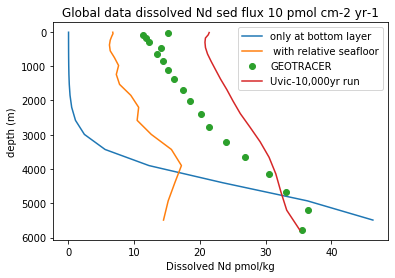

In [53]:
#exploring how variable sediment fluxes and adsoprtion coefficents impact the vertical distribution of dissolved Nd 

plt.title('Global data dissolved Nd sed flux 10 pmol cm-2 yr-1')

plt.plot((Cd[:,-1])*1e12/1020,z_C,label='only at bottom layer')
plt.plot(bf10_kp10_Cd[:,-1]*1e12/1020,bf10_kp10_depth,label= ' with relative seafloor')
#plt.plot(bf5_kp5_Cd[:,-1]/1020,bf5_kp5_depth,label= 'sed flux 5 pmol cm-2 yr-1 with kp')
#plt.plot(bf5_kp10_Cd[:,-1]/1020,bf5_kp10_depth,label= 'sed flux 5 pmol cm-2 yr-1 with kp for 10pmol cm-2 yr-1')

plt.plot(GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE']),GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE']).DEPTH,"o",label="GEOTRACER")
plt.plot(o_dnd_ave[9,:]*1e12/1020,UVIC10000yr_ds.depth,label='Uvic-10,000yr run')

plt.xlabel('Dissolved Nd pmol/kg')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()
plt.legend(loc='upper right')
#plt.legend(bbox_to_anchor=(1., 1),fontsize=10)

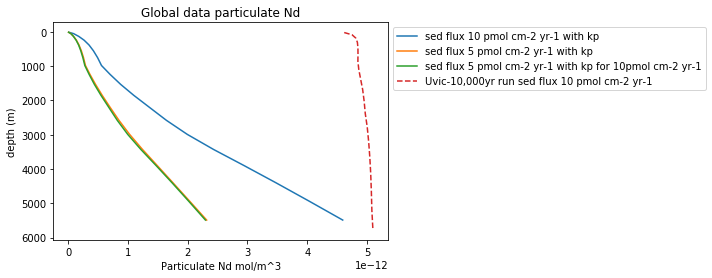

In [65]:
plt.title('Global data particulate Nd')


plt.plot(bf10_kp10_Cp[:,-1],bf10_kp10_depth,label= 'sed flux 10 pmol cm-2 yr-1 with kp')
#plt.plot(Cp[:,-1],z_C,label='')
plt.plot(bf5_kp5_Cp[:,-1],bf5_kp5_depth,label= 'sed flux 5 pmol cm-2 yr-1 with kp')
plt.plot(bf5_kp10_Cp[:,-1],bf5_kp10_depth,label= 'sed flux 5 pmol cm-2 yr-1 with kp for 10pmol cm-2 yr-1')

#plt.plot(GEOTRACERS_ds.ND_P_OBS.mean(dim=['LATITUDE','LONGITUDE'])*1e-12*1020,GEOTRACERS_ds.ND_D_OBS.mean(dim=['LATITUDE','LONGITUDE']).DEPTH,"o",label="GEOTRACER")
plt.plot(uvic_pnd_ave[9,:],UVIC10000yr_ds.depth,'--',label='Uvic-10,000yr run sed flux 10 pmol cm-2 yr-1')

plt.xlabel('Particulate Nd mol/m^3')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1., 1),fontsize=10)
#plt.xlim(0,0.5e-12)